# Importación de librerias 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# Importación base de datos Iris

In [2]:
url = "/kaggle/input/iris/Iris.csv"
df = pd.read_csv(url)

#### Visualización de datos y estadisiticas 

In [3]:
df 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Normalización de datos 

In [6]:
df = df.rename(columns={"SepalLengthCm":"Sepal_length_cm", "SepalWidthCm":"Sepal_width_cm","PetalLengthCm":"Petal_length_cm","PetalWidthCm":"Petal_width_cm"  })
df

,Id,Sepal_length_cm,Sepal_width_cm,Petal_length_cm,Petal_width_cm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
print('Species:',  df['Species'].unique(),  '\n')

Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 



In [8]:
#df["Species"].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'], [0,1,2 ], inplace=True)

# Correlación de variables

In [9]:
df.corr()

,Id,Sepal_length_cm,Sepal_width_cm,Petal_length_cm,Petal_width_cm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
Sepal_length_cm,0.716676,1.000000,-0.109369,0.871754,0.817954
Sepal_width_cm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
Petal_length_cm,0.882747,0.871754,-0.420516,1.000000,0.962757
Petal_width_cm,0.899759,0.817954,-0.356544,0.962757,1.000000


#### Visualización mapad calor de correlación de variables

<AxesSubplot:>

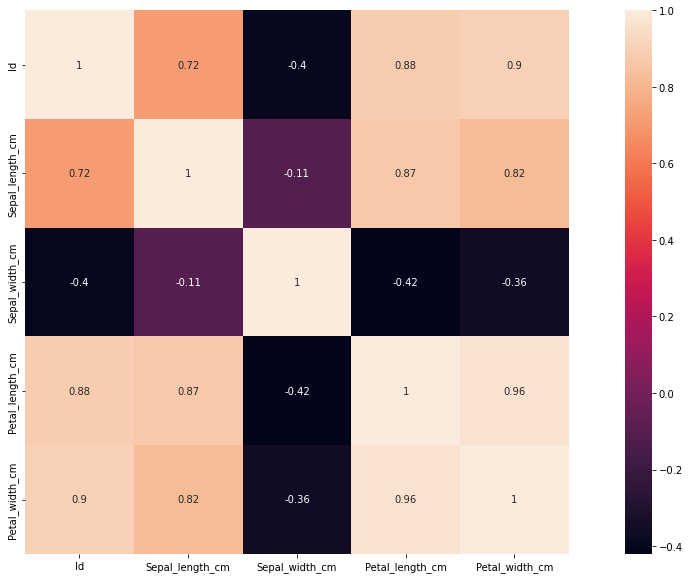

In [10]:
df_corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr, square=True, annot = True)

# Selección de modelo ML 

In [11]:
#Algortimos Ml seleccionados 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Metricas 

from sklearn.model_selection import train_test_split

In [12]:
Caracte = ["Sepal_length_cm","Sepal_width_cm","Petal_length_cm","Petal_width_cm" ]
obje = df.Species

X = df[Caracte]
y = obje

In [13]:
X_train, X_test, y_test, y_train = train_test_split(X, y, test_size = 0.20, random_state = 42)

### Regresión Logistica 

In [14]:
Log_model = LogisticRegression() 
Log_model.fit (X,y)

LogisticRegression()

In [15]:
print(Log_model.predict(X.head()))
print(df.Species.head())

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [16]:
Log_model.score(X,y)

0.9733333333333334

In [17]:

y_pred = Log_model.predict(X=df[["Sepal_length_cm","Sepal_width_cm","Petal_length_cm","Petal_width_cm"]])
#y_pred1 = DT_model.predict(X=df[["Budget_margin","Budget_sales","Budget_COGS","Inventory","Total_expenses","Budget_profit", "Marketing"]])

#df.insert (0, "Pred_RL",y_pred)
df.insert (6, "Pred",y_pred)


In [18]:
df.head(100)

,Id,Sepal_length_cm,Sepal_width_cm,Petal_length_cm,Petal_width_cm,Species,Pred
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor,Iris-versicolor


In [19]:
Columns =df.Pred, df.Species
rows = ["Pred","Species"]
data_p= pd.DataFrame(Columns,rows)
data_p.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
Pred,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,...,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
Species,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,...,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica


In [20]:
df_1 = pd.DataFrame({"Sepal_length_cm": ["6.1","5.0"], "Sepal_width_cm":["2.8","3.6"], "Petal_length_cm":["4.7", "1.4"],"Petal_width_cm":["1.2", "0.2"]})
df_1

,Sepal_length_cm,Sepal_width_cm,Petal_length_cm,Petal_width_cm
0,6.1,2.8,4.7,1.2
1,5.0,3.6,1.4,0.2


In [21]:
 pred = Log_model.predict(df_1)

In [22]:
print(pred) 

['Iris-versicolor' 'Iris-setosa']
